In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import sys

sys.path.append('/nfs/syno11/researchers/KGT/ktoraman/repos/my_libraries')  # noqa
from datautils_helper import convert_symbol
from parse_utils import get_y_m_d, daterange


from urllib.error import HTTPError

In [2]:
start_date_str = "20200120"

start_date = datetime.strptime(start_date_str, "%Y%m%d")
end_date = datetime.now()

df_agg = pd.DataFrame()

for i_date in daterange(start_date, end_date, True):
#     print(i_date)
    year = i_date.year
    month = f"{i_date.month:02}"
    day = f"{i_date.day:02}"

    url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{month}-{day}-{year}.csv"
    try:
        df = pd.read_csv(url)
    except HTTPError:
        continue

    df = df.rename(columns={"Province/State" : "state", "Country/Region": "country"})
    df = df.rename(columns={"Province_State" : "state", "Country_Region": "country"})
    df = df[["Confirmed", "Deaths", "Recovered", "country"]]
    df = df[df.country == "Singapore"]
    df["date"] = i_date
    df_agg = pd.concat([df_agg,df])

In [3]:
df_agg

,Confirmed,Deaths,Recovered,country,date
38,1.0,NaN,NaN,Singapore,2020-01-23
38,3.0,NaN,NaN,Singapore,2020-01-24
38,3.0,NaN,NaN,Singapore,2020-01-25
40,4.0,NaN,NaN,Singapore,2020-01-26
40,5.0,NaN,NaN,Singapore,2020-01-27
...,...,...,...,...,...
3637,37183.0,24.0,24209.0,Singapore,2020-06-05
3639,37527.0,25.0,24559.0,Singapore,2020-06-06
3639,37910.0,25.0,24886.0,Singapore,2020-06-07
3640,38296.0,25.0,25368.0,Singapore,2020-06-08


In [4]:
df = df_agg[["Confirmed", "Deaths", "Recovered", "date"]].reset_index(drop=True)
df = df.fillna(0)
df[["Confirmed", "Deaths", "Recovered"]] = df[["Confirmed", "Deaths", "Recovered"]].astype(int)
df = df.set_index("date")
df

,Confirmed,Deaths,Recovered
date,,,
2020-01-23,1,0,0
2020-01-24,3,0,0
2020-01-25,3,0,0
2020-01-26,4,0,0
2020-01-27,5,0,0
...,...,...,...
2020-06-05,37183,24,24209
2020-06-06,37527,25,24559
2020-06-07,37910,25,24886


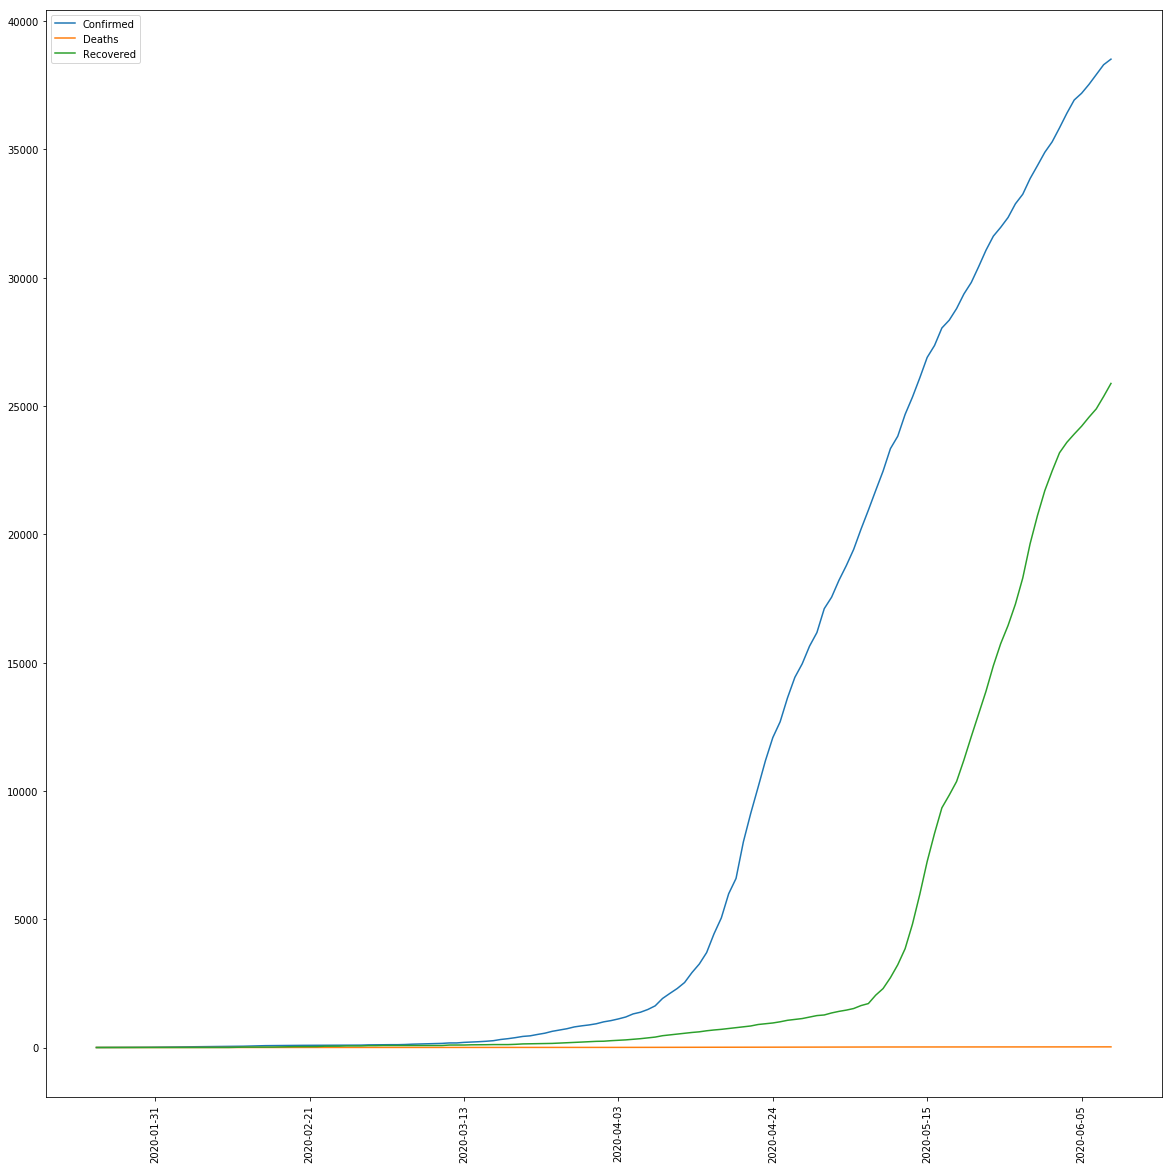

In [5]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.plot(df)
plt.legend(df.columns)
plt.savefig("sg_case_vs_discharge.png")

In [6]:
df["daily_c"] = df.Confirmed.diff()
df["daily_d"] = df.Deaths.diff()
df["daily_r"] = df.Recovered.diff()
df = df.fillna(0)
df[["daily_c", "daily_d", "daily_r"]] = df[["daily_c", "daily_d", "daily_r"]].astype(int)
df

,Confirmed,Deaths,Recovered,daily_c,daily_d,daily_r
date,,,,,,
2020-01-23,1,0,0,0,0,0
2020-01-24,3,0,0,2,0,0
2020-01-25,3,0,0,0,0,0
2020-01-26,4,0,0,1,0,0
2020-01-27,5,0,0,1,0,0
...,...,...,...,...,...,...
2020-06-05,37183,24,24209,261,0,305
2020-06-06,37527,25,24559,344,1,350
2020-06-07,37910,25,24886,383,0,327


In [7]:
df_daily = df[["daily_c", "daily_d", "daily_r"]]

In [8]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [9]:
pd.options.plotting.backend = "plotly"

In [10]:
fig = df_daily.plot()

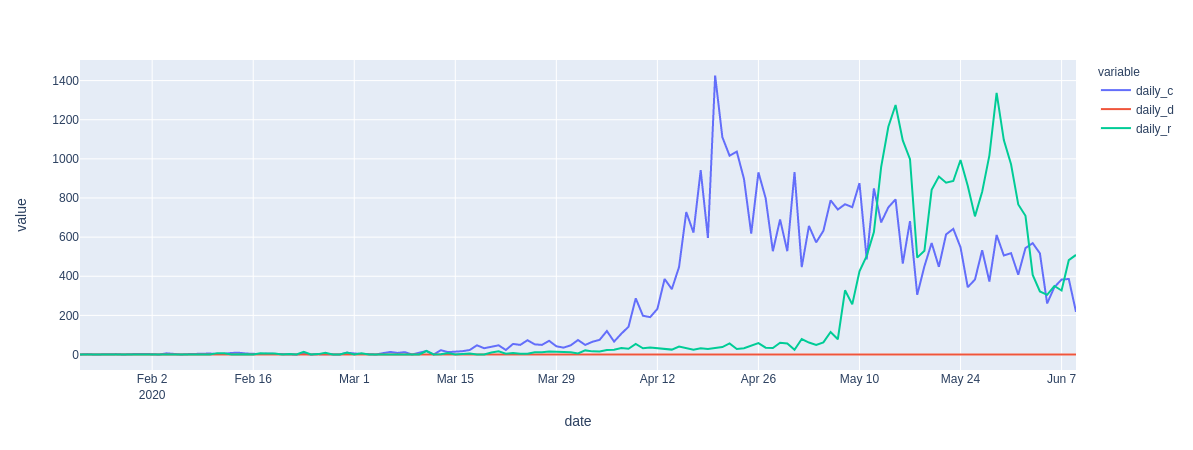

In [11]:
fig.show()

In [12]:
fig.write_image("sg_daily_case_vs_discharge.png")

In [14]:
from scipy import stats

In [15]:
stats.pearsonr(df_daily.daily_c, df_daily.daily_r)

(0.44777043108969145, 3.259688166173091e-08)